
OBJECTIVE:

To utilize clustering techniques to group different demographic attributes along with CFPB complaint data, such as race population, issue, state, zip code, complaint type, and complaint count, with the goal of enhancing focused interventions and improved solutions.

APPROACH - 

Data Preprocessing & Exploratory Data Analysis

Consumer complaint data from the CFPB and census data were collected. Loaded and cleaned the dataset to handle missing values and other inconsistencies to get better insights. Both the cleaned dataset are merged based on ZIP codes. The complaint count data, census data, and highest occurring issues/products were merged based on ZIP codes was also done. NaN values were handled, and numerical and categorical features were identified for preprocessing.
Relevant features were selected for analysis and further EDA have been done to know about the data further and use relevant attributes to get the best results.

Modelling - 

Perfomed various clustering among demographic and complaint attributes. By clustering Issue & Zip KMeans clustering was employed to group ZIP codes based on complaint types. Features were standardized and encoded using pipelines to prepare the data for clustering. The optimal number of clusters was determined using the elbow method. The optimal cluster point was at k=9, Similarly conducted clustering among attributes Race population (White, Asian, African American etc), complaint count along with state & zip to see which cluster or race might show the highest complaint count and with state and respective zip codes which shows high complaint volume. Using the elbow method optimal clusters was found to be 4 and with k as 4 clustering has been executed. A preprocessing pipeline was constructed to standardize numerical features and encode categorical features using ColumnTransformer. This ensured that the data was properly prepared for clustering. A clustering pipeline was then established using Pipeline, which included the preprocessing steps and applied KMeans clustering with four clusters. After fitting the pipeline to the merged dataset containing complaint and demographic attributes, cluster labels were assigned to each data point. The cluster summary was generated by grouping the data by cluster and calculating various statistics such as mean, median, minimum, maximum, and standard deviation also to find the most common product, ZIP code, and state within each cluster were identified using the mode() function

INFERENCES -

Cluster 0: Mortgage-related Struggles in Urban Communities
Centered around ZIP code 90001 in South Los Angeles, California, Cluster 0 reveals a significant amount of mortgage-related issues 
indicating a need for mortgage support services in this geographic area
Cluster 2, 3, 4 & 6: Challenges with Credit Report Inaccuracies
Clusters 2, 3, 4, and 6 highlight widespread instances of "Incorrect information on your report" across multiple geographic regions, including ZIP codes such as 10003, 30349, 11207, and 10459 (NY & GA) suggesting a need for addressing inaccuracies in credit reports, by improving verification processes or other specifics.
Cluster 5: Concentration of Credit Reporting Issues in Specific Region 
Represents ZIP code 11365 New York City, Cluster 5 reveals a notable concentration of credit reporting issues.
Cluster 8 & 9: Written Notification about Debt Concerns 
Associated with ZIP code 10001 in Manhattan, New York City, Clusters 8 and 9 signify a notable occurrence of written notifications about debt concerns and managing accounts.By implementaing clear communication about debts and easy-to-access resources to manage debts nmight help, considering the high population density and urban setting.

Cluster 0: Urban communities with the highest white population among all clusters, moderate complaint counts, and a notable concentration of complaints in California, particularly in ZIP code 21144, Maryland.
Cluster 1: Suburban areas with higher complaint counts compared to Cluster 0, with a moderate population diversity. Complaint issues predominantly observed in California.
Cluster 2: Rural regions with lower population density and diversity, indicating potentially lower community engagement or underreporting of complaints.
Cluster 3: High-populated urban areas with a significant African American population, concentrated in Georgia, demonstrating the highest complaint counts among all clusters, notably ZIP code 19050 from Pennsylvania.
Product Category and Issue Insights:

Credit reporting and credit repair services emerge as the highest product category across all clusters, with the major issue being "Incorrect information on your report."
Predominantly observed in New York (NY), California (CA), and Georgia (GA), these issues highlight potential areas for improvement in credit reporting accuracy and dispute resolution processes.

From the above inferences we can conclude that widespread instances of incorrect credit report information across multiple regions,  Notable occurrences of debt-related notifications, Predominance of mortgage-related complaints in South Los Angeles, highlighting a need for financial assistance. These inferences were made from clustering Issue and Zip. Majority of teh cluster complaints are seen among states CA, NY and GA with different population category like high populated Urban area with high amount of Afircan American population and Suburaban and Urban communities with high complaint volumes with high propertion of white residents in CA. Credit reporting, credit repair services is the highes product category seen among all clusters and the major issue is Incorrect information on your report. All these issues are predominantly seen i NY, CA and GA as the highest cluster points.

RECOMMENDATIONS-

Based on the clustering analysis, few recommendations can be made to address consumer issues and improve financial services. Firstly, there is a need to enhance mortgage support services in urban communities, focusing on areas with high mortgage-related struggles such as South Los Angeles, California (Cluster 0). Secondly, measures should be taken to improve credit reporting accuracy, particularly in regions highlighted by widespread inaccuracies in credit reports, like ZIP codes in New York and Georgia (Clusters 2, 3, 4, and 6). Additionally, efforts should be made to strengthen debt management resources, providing clear communication and accessible tools for managing accounts, especially in densely populated urban areas like Manhattan, New York City (Clusters 8 & 9). Also focussing on other geopgraohic locations with high population density and diversity among all races should also be notably considered to take effective measures and ensure improvements.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\Divya Chandrasekaran\\Downloads\\cfpb_data_with_clean_zip.csv')
df.shape

(2036509, 21)

In [3]:
df.columns

Index(['Date.received', 'Product', 'Sub.product', 'Issue', 'Sub.issue',
       'Consumer.complaint.narrative', 'Company.public.response', 'Company',
       'State', 'ZIP.code', 'Tags', 'Consumer.consent.provided.',
       'Submitted.via', 'Date.sent.to.company', 'Company.response.to.consumer',
       'Timely.response.', 'Consumer.disputed.', 'Complaint.ID', 'zip_best',
       'zip_three_best', 'zip_state_best'],
      dtype='object')

In [4]:
df.rename(columns=lambda x: x.replace('.', '_'), inplace=True)
df.head(5)

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,...,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Consumer_disputed_,Complaint_ID,zip_best,zip_three_best,zip_state_best
0,12/07/21,Mortgage,VA mortgage,Trouble during payment process,None,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,78666,...,NaN,Phone,12/07/21,Closed with explanation,Yes,NaN,4983111,78666,786,TX
1,07/22/22,Debt collection,Auto debt,Communication tactics,Frequent or repeated calls,NaN,None,Santander Consumer USA Holdings Inc.,NY,11692,...,NaN,Referral,08/04/22,Closed with explanation,Yes,NaN,5800836,11692,116,NY
2,10/27/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,None,"EQUIFAX, INC.",VA,22625,...,Consent not provided,Web,10/27/21,Closed with explanation,Yes,NaN,4849405,22625,226,VA
3,01/05/19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,22625,...,Consent not provided,Web,01/05/19,Closed with non-monetary relief,Yes,NaN,3117279,22625,226,VA
4,11/08/20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,22625,...,Consent not provided,Web,11/08/20,Closed with explanation,Yes,NaN,3942742,22625,226,VA


In [5]:
df_census = pd.read_csv('C:\\Users\\Divya Chandrasekaran\\Downloads\\census_data_by_zip.csv', encoding='ISO-8859-1')

In [6]:
df_census.shape

(33774, 20)

In [7]:
df_census.columns

Index(['zip', 'pop', 'pop_moe', 'pop_white', 'pop_black_or_aa', 'pop_ai_or_an',
       'pop_asian', 'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol',
       'pop_not_hol', 'income_cnt_households', 'income_cnt_households_moe',
       'income_cnt_households_with_earnings',
       'income_cnt_households_with_earnings_moe',
       'income_cnt_households_with_pub_assist',
       'income_cnt_households_with_pub_assist_moe',
       'income_mean_household_dollars', 'income_mean_household_dollars_moe'],
      dtype='object')

In [8]:
df_census.head(5)

,zip,pop,pop_moe,pop_white,pop_black_or_aa,pop_ai_or_an,pop_asian,pop_nh_or_opi,pop_other,pop_multiple,pop_hol,pop_not_hol,income_cnt_households,income_cnt_households_moe,income_cnt_households_with_earnings,income_cnt_households_with_earnings_moe,income_cnt_households_with_pub_assist,income_cnt_households_with_pub_assist_moe,income_mean_household_dollars,income_mean_household_dollars_moe
0,601,16834,506.0,3785,578,75,6,0,3358,9440,17185,57,5555.0,255.0,2703.0,484.0,5254.0,244.0,19353.0,1797.0
1,602,37642,205.0,8501,1486,156,23,7,9351,18024,37278,270,12901.0,432.0,6675.0,926.0,7688.0,205.0,26150.0,1846.0
2,603,49075,963.0,10614,2073,224,55,8,13363,23467,48996,808,19431.0,496.0,9115.0,1056.0,10379.0,211.0,27451.0,2446.0
3,606,5590,264.0,1106,384,75,10,0,1524,1910,4974,35,1983.0,181.0,1007.0,344.0,1244.0,54.0,18534.0,2200.0
4,610,25542,344.0,4713,1472,71,7,8,6228,13232,25489,242,8864.0,348.0,4883.0,818.0,4919.0,110.0,27865.0,2317.0


In [9]:
df['zip_best'] = df['zip_best'].astype(str)
df_census['zip'] = df_census['zip'].astype(str)
# Merge the two DataFrames based on 'zip_best' and 'zip' columns
df_joined = pd.merge(df, df_census, left_on='zip_best', right_on='zip', how='inner')

In [10]:
df_joined.columns

Index(['Date_received', 'Product', 'Sub_product', 'Issue', 'Sub_issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Tags', 'Consumer_consent_provided_',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response_', 'Consumer_disputed_', 'Complaint_ID', 'zip_best',
       'zip_three_best', 'zip_state_best', 'zip', 'pop', 'pop_moe',
       'pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian',
       'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol', 'pop_not_hol',
       'income_cnt_households', 'income_cnt_households_moe',
       'income_cnt_households_with_earnings',
       'income_cnt_households_with_earnings_moe',
       'income_cnt_households_with_pub_assist',
       'income_cnt_households_with_pub_assist_moe',
       'income_mean_household_dollars', 'income_mean_household_dollars_moe'],
      dtype='object')

In [11]:
df_joined.shape

(1800487, 41)

In [12]:
#df['ZIP code'] = df['ZIP_code'].astype(str)
#df_census['zip'] = df_census['zip'].astype(str)

# Merging the data
#df_joined = pd.merge(df, df_census, left_on='ZIP_code', right_on='zip', how='inner')

In [13]:
pd.set_option('display.max_columns', None)
df_joined.head(5)

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Consumer_disputed_,Complaint_ID,zip_best,zip_three_best,zip_state_best,zip,pop,pop_moe,pop_white,pop_black_or_aa,pop_ai_or_an,pop_asian,pop_nh_or_opi,pop_other,pop_multiple,pop_hol,pop_not_hol,income_cnt_households,income_cnt_households_moe,income_cnt_households_with_earnings,income_cnt_households_with_earnings_moe,income_cnt_households_with_pub_assist,income_cnt_households_with_pub_assist_moe,income_mean_household_dollars,income_mean_household_dollars_moe
0,12/07/21,Mortgage,VA mortgage,Trouble during payment process,None,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,78666,"Older American, Servicemember",NaN,Phone,12/07/21,Closed with explanation,Yes,NaN,4983111,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0
1,10/05/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair credit Reporting A...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,78666,None,Consent provided,Web,10/05/22,Closed with explanation,Yes,NaN,6053437,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0
2,08/22/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78666,None,Consent not provided,Web,08/22/22,Closed with non-monetary relief,Yes,NaN,5902961,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0
3,10/14/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,"On XX/XX/2022, I first sent a letter regarding...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78666,None,Consent provided,Web,10/14/22,Closed with non-monetary relief,Yes,NaN,6087171,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0
4,09/09/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair credit Reporting A...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,78666,None,Consent provided,Web,09/09/22,Closed with non-monetary relief,Yes,NaN,5965797,78666,786,TX,78666,86530,1587.0,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,853.0,24276.0,1716.0,3632.0,323.0,59651.0,2559.0


In [14]:
import pandas as pd

# Converting date columns to datetime 
df_joined['Date_received'] = pd.to_datetime(df_joined['Date_received'])
df_joined['Date_sent_to_company'] = pd.to_datetime(df_joined['Date_sent_to_company'])

# Check if dates are the same
df_joined['dates_match'] = df_joined['Date_received'] == df_joined['Date_sent_to_company']

# Count rows with different dates
rows_with_diff_dates = (~df_joined['dates_match']).sum()

print(f"Number of rows with different dates: {rows_with_diff_dates}")


Number of rows with different dates: 157542


In [15]:
# Check for null values in df
null_values = df_joined.isnull().sum()

# Print 
print(null_values)


Date_received                                      0
Product                                            0
Sub_product                                        0
Issue                                              0
Sub_issue                                          0
Consumer_complaint_narrative                 1075929
Company_public_response                            0
Company                                            0
State                                              0
ZIP_code                                           0
Tags                                               0
Consumer_consent_provided_                    143821
Submitted_via                                      0
Date_sent_to_company                               0
Company_response_to_consumer                       0
Timely_response_                                   0
Consumer_disputed_                           1800487
Complaint_ID                                       0
zip_best                                      

In [16]:
# Get unique values company response column
unique_values = df['Company_response_to_consumer'].unique()

# Print
print(unique_values)
value_counts = df['Company_response_to_consumer'].value_counts()
print(value_counts)

['Closed with explanation' 'Closed with non-monetary relief'
 'Closed with monetary relief' 'Untimely response' 'In progress' 'None']
Closed with explanation            1598834
Closed with non-monetary relief     377651
Closed with monetary relief          56260
Untimely response                     3761
In progress                              2
None                                     1
Name: Company_response_to_consumer, dtype: int64


In [17]:
# Removing unnecessary columns 
columns_to_drop = ['Tags', 'Company_public_response', 'Consumer_disputed_', 'pop_moe', 'income_cnt_households_moe',                   
                   'income_cnt_households_with_earnings_moe', 'income_cnt_households_with_pub_assist_moe',
                   'income_mean_household_dollars_moe']

#new dataFrame with the dropped columns
df_final = df_joined.drop(columns=columns_to_drop)

# Print 
print(df_final.columns)

Index(['Date_received', 'Product', 'Sub_product', 'Issue', 'Sub_issue',
       'Consumer_complaint_narrative', 'Company', 'State', 'ZIP_code',
       'Consumer_consent_provided_', 'Submitted_via', 'Date_sent_to_company',
       'Company_response_to_consumer', 'Timely_response_', 'Complaint_ID',
       'zip_best', 'zip_three_best', 'zip_state_best', 'zip', 'pop',
       'pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian',
       'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol', 'pop_not_hol',
       'income_cnt_households', 'income_cnt_households_with_earnings',
       'income_cnt_households_with_pub_assist',
       'income_mean_household_dollars', 'dates_match'],
      dtype='object')


In [18]:
df_final.head(5)

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company,State,ZIP_code,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Complaint_ID,zip_best,zip_three_best,zip_state_best,zip,pop,pop_white,pop_black_or_aa,pop_ai_or_an,pop_asian,pop_nh_or_opi,pop_other,pop_multiple,pop_hol,pop_not_hol,income_cnt_households,income_cnt_households_with_earnings,income_cnt_households_with_pub_assist,income_mean_household_dollars,dates_match
0,2021-12-07,Mortgage,VA mortgage,Trouble during payment process,None,NaN,WELLS FARGO & COMPANY,TX,78666,NaN,Phone,2021-12-07,Closed with explanation,Yes,4983111,78666,786,TX,78666,86530,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,24276.0,3632.0,59651.0,True
1,2022-10-05,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair credit Reporting A...,Experian Information Solutions Inc.,TX,78666,Consent provided,Web,2022-10-05,Closed with explanation,Yes,6053437,78666,786,TX,78666,86530,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,24276.0,3632.0,59651.0,True
2,2022-08-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78666,Consent not provided,Web,2022-08-22,Closed with non-monetary relief,Yes,5902961,78666,786,TX,78666,86530,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,24276.0,3632.0,59651.0,True
3,2022-10-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,"On XX/XX/2022, I first sent a letter regarding...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,78666,Consent provided,Web,2022-10-14,Closed with non-monetary relief,Yes,6087171,78666,786,TX,78666,86530,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,24276.0,3632.0,59651.0,True
4,2022-09-09,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair credit Reporting A...,Experian Information Solutions Inc.,TX,78666,Consent provided,Web,2022-09-09,Closed with non-monetary relief,Yes,5965797,78666,786,TX,78666,86530,47756,5484,836,2134,82,11737,18555,36770,49814,29205.0,24276.0,3632.0,59651.0,True


In [19]:
# Group by ZIP code and count complaints
complaint_counts = df_final.groupby('zip_best').size().reset_index(name='complaint_count')

# Merge with census data
merged_data = pd.merge(complaint_counts, df_final, on='zip_best', how='left')

# correlation coefficients
correlation_matrix = merged_data.corr()

# Correlation with commplaint coynts 
complaint_count_correlation = correlation_matrix['complaint_count']

# Sort desc
sorted_correlation = complaint_count_correlation.abs().sort_values(ascending=False)

# Print 
print("Top correlations with complaint counts:")
print(sorted_correlation)

#merged_data.head(5)

Top correlations with complaint counts:
complaint_count                          1.000000
pop_black_or_aa                          0.696285
pop_not_hol                              0.450791
income_cnt_households_with_pub_assist    0.442653
pop                                      0.436721
income_cnt_households                    0.428094
income_cnt_households_with_earnings      0.419004
pop_multiple                             0.190062
income_mean_household_dollars            0.168418
pop_hol                                  0.138891
pop_other                                0.115688
pop_white                                0.099903
dates_match                              0.072006
pop_asian                                0.055262
pop_nh_or_opi                            0.045698
Complaint_ID                             0.027920
pop_ai_or_an                             0.006514
Name: complaint_count, dtype: float64


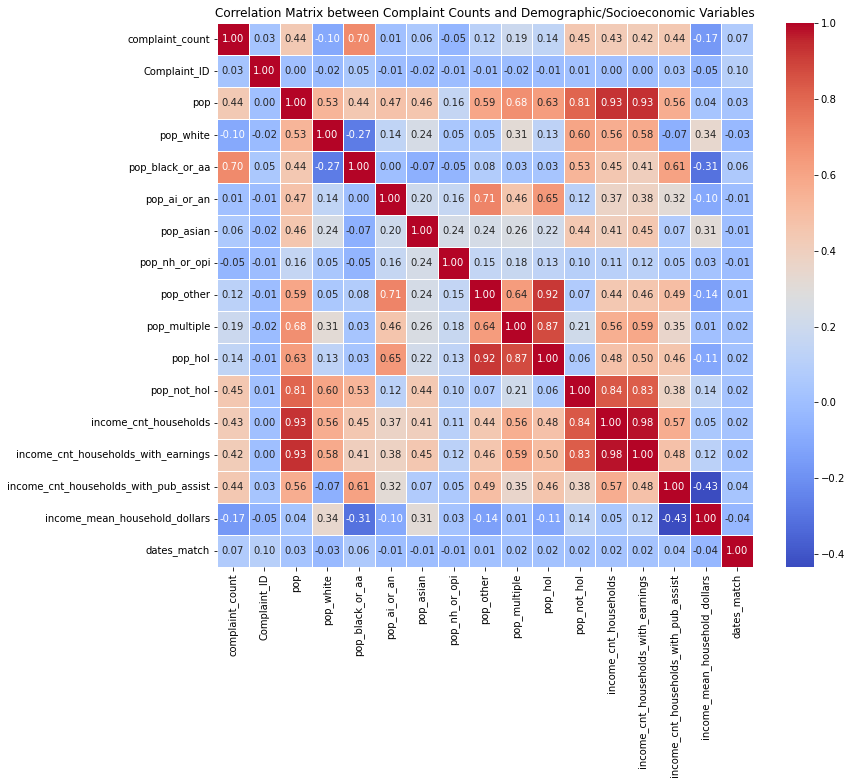

In [20]:
correlation_matrix = merged_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Complaint Counts and Demographic/Socioeconomic Variables')
plt.show()

**CLUSTERING BY ISSUE AND ZIP**

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import numpy as np

# focusing on relevant fields
df_agg = merged_data[['zip_best', 'Issue']].copy()

df_agg = df_agg.groupby(['zip_best', 'Issue']).size().reset_index(name='counts')

# Encode and standardize  
categorical_features = ['zip_best', 'Issue']
numerical_features = ['counts']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Clusering pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=10, random_state=42))  # Adjust the number of clusters as needed
])

# Fit an dcluster labels
pipeline.fit(df_agg)
df_agg['Cluster'] = pipeline.named_steps['kmeans'].labels_

# Cluster summary
cluster_summary = df_agg.groupby('Cluster').agg({'counts': ['mean', 'median', 'min', 'max', 'std'],
                                                 'zip_best': lambda x: x.mode()[0],
                                                 'Issue': lambda x: x.mode()[0]})
print("Cluster Characteristics:")
print(cluster_summary)

cluster_sizes = df_agg['Cluster'].value_counts()
print("\nCluster sizes:")
print(cluster_sizes)


Cluster Characteristics:
              counts                               zip_best  \
                mean median  min   max         std <lambda>   
Cluster                                                       
0           2.074333    1.0    1    30    2.056582    90001   
1           9.559093    5.0    1    67   11.915693    10001   
2          14.843665    7.0    1    66   16.506121    10003   
3        1041.277778  903.0  686  4054  482.327404    30349   
4         330.449153  299.0  221   677  100.423759    11207   
5          10.865080    5.0    1    62   13.233550    11365   
6         111.811936   99.0   62   222   41.009785    10459   
7           3.818824    2.0    1    59    4.143256    10001   
8           5.856548    3.0    1    65    6.750617    10001   
9           4.422635    2.0    1    63    6.112163    10001   

                                                     Issue  
                                                  <lambda>  
Cluster                          

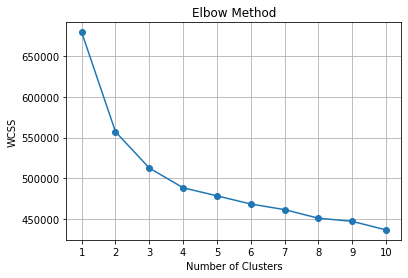

In [56]:
# WCSS against the number of clusters
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(preprocessor.fit_transform(df_agg))
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [57]:
# Filter the DataFrame to get the row where the zip code is '10001'
#row_10001 = df[df['zip_best'] == '10001']

# If there are multiple rows with the same zip code, you can choose one
# For example, if you want the first occurrence:
#row_10001 = row_10001.iloc[0]

# Get the state associated with the zip code '10001'
#state_10001 = row_10001['State']

# Print the state associated with zip code '10001'
#print("The state associated with zip code 10001 is:", state_10001)


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import numpy as np

#  relevant fields
df_agg = merged_data[['zip_best', 'Issue']].copy()

df_agg = df_agg.groupby(['zip_best', 'Issue']).size().reset_index(name='counts')

# Encode and standardize data 
categorical_features = ['zip_best', 'Issue']
numerical_features = ['counts']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#  clustering pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust the number of clusters as needed
])

# Fit pipeline & cluster labels
pipeline.fit(df_agg)
df_agg['Cluster'] = pipeline.named_steps['kmeans'].labels_

#  cluster summary
cluster_summary = df_agg.groupby('Cluster').agg({'counts': ['mean', 'median', 'min', 'max', 'std'],
                                                 'zip_best': lambda x: x.mode()[0],
                                                 'Issue': lambda x: x.mode()[0]})
print("Cluster Characteristics:")
print(cluster_summary)

cluster_sizes = df_agg['Cluster'].value_counts()
print("\nCluster sizes:")
print(cluster_sizes)


Cluster Characteristics:
              counts                               zip_best  \
                mean median  min   max         std <lambda>   
Cluster                                                       
0           3.765715    2.0    1    46    5.756969    90001   
1          84.507797   72.0   41   192   37.751889    10001   
2        1017.155844  894.0  661  4054  475.211672    30349   
3         298.935185  266.0  191   653   99.721956    11207   

                                        Issue  
                                     <lambda>  
Cluster                                        
0                         Managing an account  
1        Incorrect information on your report  
2        Incorrect information on your report  
3        Incorrect information on your report  

Cluster sizes:
0    220496
1      6733
3      1080
2        77
Name: Cluster, dtype: int64


In [59]:
#df_agg.head(5)

In [60]:
#df_agg.to_csv('cluster_data_IssueZip.csv', index=False)

**Inferences from the cluster**


Cluster 0, centered around ZIP code 90001(where majority of the data points are) in South Los Angeles, California, highlights a significant prevalence of mortgage-related struggles, indicating a need for targeted financial assistance and mortgage support services in this geographic area.

Cluster 2,3,4 & 6 identifies widespread instances of "Incorrect information on your report" across multiple geographic regions represented by ZIP codes 10003, 30349, 11207, and 10459(NY & GA). This suggests a shared challenge among customers in these areas regarding inaccuracies in credit reports.

Cluster 5, represented by ZIP code 11365 in Fresh Meadows, Queens, New York City, reveals a notable concentration of credit reporting issues, suggesting opportunities for credit reporting agencies and financial institutions to enhance its service in this region

Cluster 8 & 9, associated with ZIP code 10001 in Manhattan, New York City, signifies a notable occurrence of written notification about debt concerns & managing an account, these areas might need  clear communication about debts and easy-to-access resources to manage debts effectively.

To address such issues, businesses, particularly credit reporting agencies and financial institutions, can implement targeted outreach initiatives aimed at residents for these zip codes and zips similar to these.


In [22]:
# Group by 'zip_best' and 'state' and count the number of complaints
complaint_count = df.groupby(['zip_best', 'State']).size().reset_index(name='complaint_count')

#  new df with 'zip_best', 'state', and 'complaint_count'
new_df = complaint_count.copy()

#new_df.head(10)

In [23]:
#new_df.shape

In [24]:
# Merge new_df with census data
selected_columns = ['pop', 'pop_white', 'pop_black_or_aa', 'pop_ai_or_an',
                    'pop_asian', 'pop_nh_or_opi', 'pop_other', 'pop_multiple',
                    'pop_hol', 'pop_not_hol', 'income_mean_household_dollars']

joined_df = pd.merge(new_df,  df_census[['zip'] + selected_columns], left_on='zip_best', right_on='zip', how='left')

# Count NaN values in each column
nan_counts = joined_df.isna().sum()


In [25]:
#Merging hihest count of the Issue column to the joimed_df

In [26]:
# Group by 'zip_best' and count the occurrences of each issue
issue_counts = df.groupby(['zip_best', 'Issue']).size().reset_index(name='issue_count')

# Get the index of the highest occurring issue for each zip code
idx = issue_counts.groupby('zip_best')['issue_count'].idxmax()

# Select the highest occurring issue for each zip code
highest_issues = issue_counts.loc[idx, ['zip_best', 'Issue']]

# Merge the highest occurring issues with the first DataFrame based on the 'zip_best' column
merged_df_with_issue = pd.merge(joined_df, highest_issues, on='zip_best', how='left')

#merged_df_with_issue.head(5)


In [27]:
# Group by 'zip_best' and 'Product' and count prodct
product_counts = df.groupby(['zip_best', 'Product']).size().reset_index(name='product_count')
product_idx = product_counts.groupby('zip_best')['product_count'].idxmax()

# get highest product for each zip code
highest_products = product_counts.loc[product_idx, ['zip_best', 'Product']]

# Merge original DataFrame based on the 'zip_best' column
merged_df_with_issue_product = pd.merge(merged_df_with_issue, highest_products, on='zip_best', how='left')



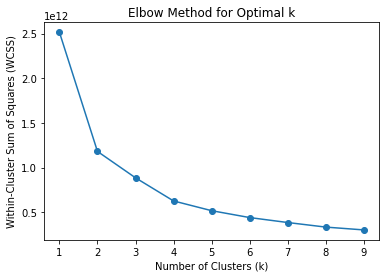

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

joined_df.dropna(inplace=True)
k_values = range(1,10)
wcss_values = []

numerical_features = ['pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian', 'complaint_count']

# calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(joined_df[numerical_features])
    wcss_values.append(kmeans.inertia_)

# Plot 
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [28]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

joined_df.dropna(inplace=True)

# numerical and categorical features
numerical_features = ['pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian', 'complaint_count']
categorical_features = ['State','zip_best']

#  preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# clustering pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust the number of clusters as needed
])

# fit pipeline
pipeline.fit(joined_df)

# obtain cluster labels
cluster_labels = pipeline.named_steps['kmeans'].labels_

# create a new DataFrame with cluster labels
clustered_df = joined_df.copy()
clustered_df['Cluster'] = cluster_labels

# group by cluster and calculate summary statistics
cluster_summary = clustered_df.groupby('Cluster').agg({
                                                 'pop_white': ['mean', 'median', 'min', 'max', 'std'],
                                                 'pop_black_or_aa': ['mean', 'median', 'min', 'max', 'std'],
                                                 'pop_ai_or_an': ['mean', 'median', 'min', 'max', 'std'],
                                                 'pop_asian': ['mean', 'median', 'min', 'max', 'std'],
                                                 'complaint_count': ['mean', 'median', 'min', 'max', 'std'],
                                                 'State': lambda x: x.mode()[0],
                                                 'zip_best': lambda x: x.mode()[0]
                                            })

# get cluster sizes
cluster_sizes = clustered_df.groupby('Cluster').size().reset_index(name='cluster_size')

# merge cluster sizes with the cluster summary
cluster_summary = pd.merge(cluster_summary, cluster_sizes, on='Cluster')
print(cluster_summary)


   Cluster  (pop_white, mean)  (pop_white, median)  (pop_white, min)  \
0        0       22313.343417              21064.0               4.0   
1        1       17807.456091              14861.0            2074.0   
2        2        4876.903989               3521.5               1.0   
3        3       11917.929239               9604.0             309.0   

   (pop_white, max)  (pop_white, std)  (pop_black_or_aa, mean)  \
0           65359.0       9174.010090              3075.938869   
1           60100.0      11912.583049              3564.898017   
2           19172.0       4226.686319               763.890111   
3           55568.0       9572.850289             20891.819760   

   (pop_black_or_aa, median)  (pop_black_or_aa, min)  (pop_black_or_aa, max)  \
0                     1903.0                     0.0                 21196.0   
1                     2173.0                   113.0                 21417.0   
2                       89.0                     0.0                

C:\Users\DIVYAC~1\AppData\Local\Temp/ipykernel_10140/1370813487.py:51: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  cluster_summary = pd.merge(cluster_summary, cluster_sizes, on='Cluster')


In [29]:
clustered_df = joined_df.copy()

# Add the cluster labels to clustered_df
clustered_df['Cluster'] = cluster_labels

#clustered_df.to_csv('clustered_data.csv', index=False)

**Inferences From above clustering**

Cluster 0 - Urban communities (because of diverse population)
This cluster has the highest white ppopulation among all clusters, complaint counts are moderate with an average complaint count of 172. Most of the complaints located in California and the hihest count of complaint is specifically seen in zip 21144, Maryland.

Cluster 1 - Suburban Area (MOderate population diversity)
Complaint counts are higher than cluster 0 with an average count of 316. Though the population of white is lower compared to cluster 0, it still higher compared to oterh 2 clusters. Issue predominantly seen in CA.

Cluster 2 - Rural (Low population density)
Cluster consists of lower population density and diversity. This cluster has the lowest population of white
individuals among all clusters, complaints  counts are significantly lower with an average count of 20, it might indicate potential underreporting or lower community engagement.

Cluster 3 - High populated Urban areas
High population density, high Black African American population is seen and most of the complaints in this cluster are located in Georgia with an averga complaint count of 784 and highest among all clusters indidcaing potential issues. HIhest complaint count is seen for the Zip 19050 from Pennsylvania.


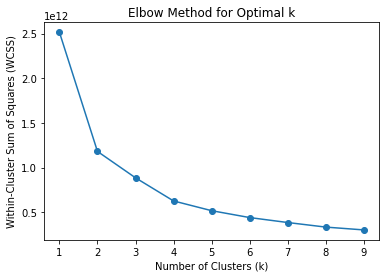

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

merged_df_with_issue.dropna(inplace=True)
k_values = range(1,10)
wcss_values = []

numerical_features = ['pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian', 'complaint_count']
categorical_features = ['State', 'Issue']
# calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(merged_df_with_issue[numerical_features])
    wcss_values.append(kmeans.inertia_)

# Plot
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [32]:
merged_df_with_issue.dropna(inplace=True)
numerical_features = ['pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian', 'complaint_count']
categorical_features = ['State', 'Issue']

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# clustering pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust the number of clusters as needed
])

#cluster labels
pipeline.fit(merged_df_with_issue)
merged_df_with_issue['Cluster'] = pipeline.named_steps['kmeans'].labels_

# clusters details
cluster_summary = merged_df_with_issue.groupby('Cluster').agg({
    'pop_white': ['mean', 'median', 'min', 'max', 'std'],
    'pop_black_or_aa': ['mean', 'median', 'min', 'max', 'std'],
    'pop_ai_or_an': ['mean', 'median', 'min', 'max', 'std'],
    'pop_asian': ['mean', 'median', 'min', 'max', 'std'],
    'complaint_count': ['mean', 'median', 'min', 'max', 'std'],
    'Issue': lambda x: x.mode()[0]
})

cluster_sizes = merged_df_with_issue.groupby('Cluster').size().reset_index(name='cluster_size')
cluster_summary = pd.merge(cluster_summary, cluster_sizes, on='Cluster')

print(cluster_summary)

   Cluster  (pop_white, mean)  (pop_white, median)  (pop_white, min)  \
0        0        4837.847745               3489.0               1.0   
1        1       22130.937128              20882.0               4.0   
2        2       11948.298547               9644.0             309.0   
3        3       17855.423729              14916.5            2074.0   

   (pop_white, max)  (pop_white, std)  (pop_black_or_aa, mean)  \
0           20060.0       4204.566211               748.657712   
1           65359.0       9213.200668              3057.878159   
2           55568.0       9607.264826             20823.932629   
3           60100.0      11885.040868              3576.101695   

   (pop_black_or_aa, median)  (pop_black_or_aa, min)  (pop_black_or_aa, max)  \
0                       87.0                     0.0                 19135.0   
1                     1883.0                     0.0                 21196.0   
2                    18140.0                   116.0                

C:\Users\DIVYAC~1\AppData\Local\Temp/ipykernel_10140/1418730059.py:33: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  cluster_summary = pd.merge(cluster_summary, cluster_sizes, on='Cluster')


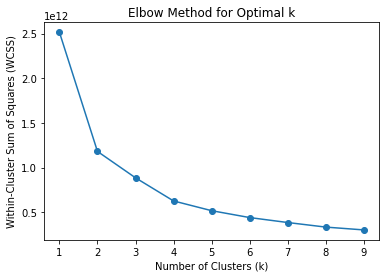

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

merged_df_with_issue_product.dropna(inplace=True)

k_values = range(1,10)
wcss_values = []

numerical_features = ['pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian', 'complaint_count']
categorical_features = ['zip_best', 'Product']
# calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(merged_df_with_issue_product[numerical_features])
    wcss_values.append(kmeans.inertia_)

# Plot 
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [35]:
merged_df_with_issue_product.dropna(inplace=True)
numerical_features = ['pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian', 'complaint_count']
categorical_features = ['zip_best', 'Product', 'State']

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# clustering pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust the number of clusters as needed
])

# cluster labels
pipeline.fit(merged_df_with_issue_product)
merged_df_with_issue_product['Cluster'] = pipeline.named_steps['kmeans'].labels_

cluster_summary = merged_df_with_issue_product.groupby('Cluster').agg({
    'pop_white': ['mean', 'median', 'min', 'max', 'std'],
    'pop_black_or_aa': ['mean', 'median', 'min', 'max', 'std'],
    'pop_ai_or_an': ['mean', 'median', 'min', 'max', 'std'],
    'pop_asian': ['mean', 'median', 'min', 'max', 'std'],
    'complaint_count': ['mean', 'median', 'min', 'max', 'std'],
    'Product': lambda x: x.mode()[0],
    'zip_best': lambda x: x.mode()[0],
    'State': lambda x: x.mode()[0],
                                                })

cluster_sizes = merged_df_with_issue_product.groupby('Cluster').size().reset_index(name='cluster_size')

cluster_summary = pd.merge(cluster_summary, cluster_sizes, on='Cluster')

print(cluster_summary)

   Cluster  (pop_white, mean)  (pop_white, median)  (pop_white, min)  \
0        0       22018.798787              20755.0               4.0   
1        1        4783.689787               3457.0               1.0   
2        2       11912.372995               9601.0             309.0   
3        3       17825.430986              14883.0            2074.0   

   (pop_white, max)  (pop_white, std)  (pop_black_or_aa, mean)  \
0           65359.0       9197.629037              3075.284328   
1           20721.0       4148.219769               737.306069   
2           55568.0       9578.047053             20906.102941   
3           60100.0      11881.688378              3570.861972   

   (pop_black_or_aa, median)  (pop_black_or_aa, min)  (pop_black_or_aa, max)  \
0                     1907.0                     0.0                 21196.0   
1                       85.0                     0.0                 19135.0   
2                    18226.0                   116.0                

C:\Users\DIVYAC~1\AppData\Local\Temp/ipykernel_10140/3453178537.py:35: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  cluster_summary = pd.merge(cluster_summary, cluster_sizes, on='Cluster')


**Inference from above Clusters**

From the above clusters we can see that Credit reporting, credit repair services is the highes product category seen among all clusters and the major issue is Incorrect information on your report. All these issues are predominantly seen i NY, CA and GA as the highest cluster points.